In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(r"D:\Jupyter CS 273A\Project\data")

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack,csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [16]:
train = pd.read_csv('train.csv').fillna(' ')
test = pd.read_csv('test.csv').fillna(' ')

#train=train.sample(frac=0.25, replace=True)

train,val=train_test_split(train,test_size=0.25)


In [17]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [18]:
train_text = train['comment_text']
validation_text = val['comment_text']

test_text = test['comment_text']

all_text = pd.concat([train_text, test_text,validation_text])

In [19]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',\
                                  stop_words='english',ngram_range=(1,3),max_features=20000)
word_vectorizer.fit(all_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=True,
        token_pattern='\\w{1,}', tokenizer=None, use_idf=True,
        vocabulary=None)

In [20]:
train_features = word_vectorizer.transform(train_text)
test_features = word_vectorizer.transform(test_text)
val_features = word_vectorizer.transform(validation_text)

In [23]:
scores = []
test_pred = pd.DataFrame.from_dict({'id': test['id']})
train_pred= pd.DataFrame.from_dict({'id': train['id']})
val_pred= pd.DataFrame.from_dict({'id': val['id']})
aucsmean=[]
plt.figure(figsize=(10,5))

leafn=[10,30,50,70,100,150]
#treen=[5,10]


for i in leafn:
    aucs=[]
    for class_name in class_names:
        print(i)
        train_target = train[class_name]
        classifier = DecisionTreeClassifier(max_leaf_nodes=i)

        classifier.fit(train_features, train_target)
        #train_pred[class_name]=classifier.predict_proba(train_features)[:, 1]
        val_pred[class_name]=classifier.predict_proba(val_features)[:, 1]
        #test_pred[class_name]=classifier.predict_proba(test_features)[:, 1]

        false_positive_rate, recall, thresholds = roc_curve(val[class_name],val_pred[class_name])
        roc_auc = auc(false_positive_rate, recall)
        #print(roc_auc)
        aucs.append(roc_auc)
    aucsmean.append(np.mean(aucs))

        #plt.plot(false_positive_rate, recall, label='AUC = %0.2f' %roc_auc)
    

10
10
10
10
10
10
30
30
30
30
30
30
50
50
50
50
50
50
70
70
70
70
70
70
100
100
100
100
100
100
150
150
150
150
150
150


<Figure size 720x360 with 0 Axes>

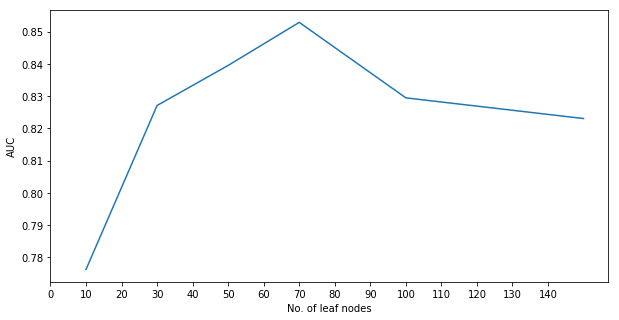

In [26]:
plt.figure(figsize=(10,5))
plt.plot(leafn, aucsmean)
plt.xticks(np.arange(0, 150, step=10))
plt.xlabel("No. of leaf nodes")
plt.ylabel("AUC")
#plt.legend(class_names,loc="lower right")
plt.show()


Training class: toxic
Training class: severe_toxic
Training class: obscene
Training class: threat
Training class: insult
Training class: identity_hate


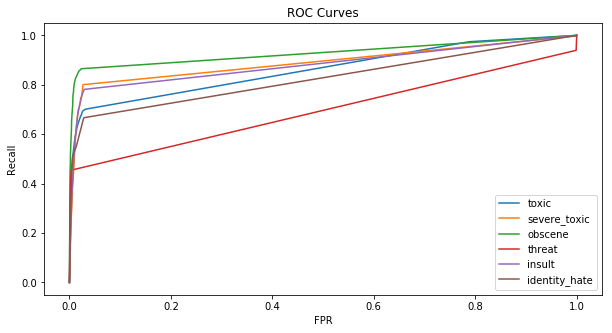

Validation AUC = 0.8467627966475667


In [27]:
scores = []
test_pred = pd.DataFrame.from_dict({'id': test['id']})
train_pred= pd.DataFrame.from_dict({'id': train['id']})
val_pred= pd.DataFrame.from_dict({'id': val['id']})
aucs=[]
plt.figure(figsize=(10,5))

for class_name in class_names:
    print("Training class: "+class_name)
    train_target = train[class_name]
    classifier = DecisionTreeClassifier(max_leaf_nodes=75)
    
    classifier.fit(train_features, train_target)
    #train_pred[class_name]=classifier.predict_proba(train_features)[:, 1]
    val_pred[class_name]=classifier.predict_proba(val_features)[:, 1]
    #test_pred[class_name]=classifier.predict_proba(test_features)[:, 1]


    false_positive_rate, recall, thresholds = roc_curve(val[class_name],val_pred[class_name])
    roc_auc = auc(false_positive_rate, recall)
    #print(roc_auc)
    aucs.append(roc_auc)

    plt.plot(false_positive_rate, recall, label='AUC = %0.2f' %roc_auc)
    
plt.title("ROC Curves")
plt.xlabel("FPR")
plt.ylabel("Recall")
plt.legend(class_names,loc="lower right")
plt.show()

print("Validation AUC = "+str(np.mean(aucs)))

In [30]:
scores = []
test_pred = pd.DataFrame.from_dict({'id': test['id']})
train_pred= pd.DataFrame.from_dict({'id': train['id']})
val_pred= pd.DataFrame.from_dict({'id': val['id']})
aucsmean=[]
plt.figure(figsize=(10,5))

leafn=[2,3,5,7,10,15,20]
#treen=[5,10]


for i in leafn:
    aucs=[]
    for class_name in class_names:
        print(i)
        train_target = train[class_name]
        classifier = DecisionTreeClassifier(max_depth=i)

        classifier.fit(train_features, train_target)
        #train_pred[class_name]=classifier.predict_proba(train_features)[:, 1]
        val_pred[class_name]=classifier.predict_proba(val_features)[:, 1]
        #test_pred[class_name]=classifier.predict_proba(test_features)[:, 1]

        false_positive_rate, recall, thresholds = roc_curve(val[class_name],val_pred[class_name])
        roc_auc = auc(false_positive_rate, recall)
        #print(roc_auc)
        aucs.append(roc_auc)
    aucsmean.append(np.mean(aucs))

        #plt.plot(false_positive_rate, recall, label='AUC = %0.2f' %roc_auc)
    
    

2
2
2
2
2
2
3
3
3
3
3
3
5
5
5
5
5
5
7
7
7
7
7
7
10
10
10
10
10
10
15
15
15
15
15
15
20
20
20
20
20
20


<Figure size 720x360 with 0 Axes>

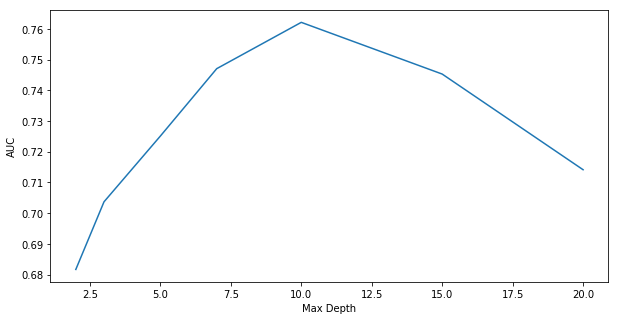

In [31]:
plt.figure(figsize=(10,5))
plt.plot(leafn, aucsmean)
#plt.xticks(np.arange(0, 20, step=10))
plt.xlabel("Max Depth")
plt.ylabel("AUC")
#plt.legend(class_names,loc="lower right")
plt.show()


Training class: toxic
Training class: severe_toxic
Training class: obscene
Training class: threat
Training class: insult
Training class: identity_hate


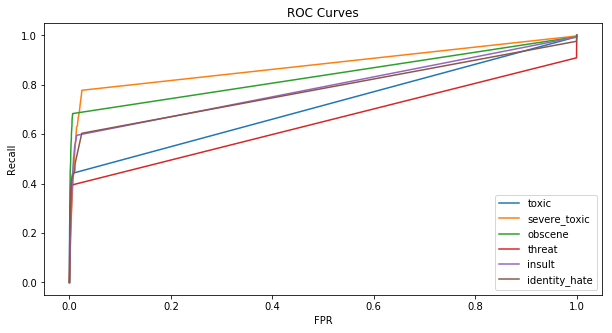

Validation AUC = 0.7753462827085512


In [33]:
scores = []
test_pred = pd.DataFrame.from_dict({'id': test['id']})
train_pred= pd.DataFrame.from_dict({'id': train['id']})
val_pred= pd.DataFrame.from_dict({'id': val['id']})
aucs=[]
plt.figure(figsize=(10,5))

for class_name in class_names:
    print("Training class: "+class_name)
    train_target = train[class_name]
    classifier = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=75)
    
    classifier.fit(train_features, train_target)
    #train_pred[class_name]=classifier.predict_proba(train_features)[:, 1]
    val_pred[class_name]=classifier.predict_proba(val_features)[:, 1]
    #test_pred[class_name]=classifier.predict_proba(test_features)[:, 1]


    false_positive_rate, recall, thresholds = roc_curve(val[class_name],val_pred[class_name])
    roc_auc = auc(false_positive_rate, recall)
    #print(roc_auc)
    aucs.append(roc_auc)

    plt.plot(false_positive_rate, recall, label='AUC = %0.2f' %roc_auc)
    
plt.title("ROC Curves")
plt.xlabel("FPR")
plt.ylabel("Recall")
plt.legend(class_names,loc="lower right")
plt.show()

print("Validation AUC = "+str(np.mean(aucs)))

In [49]:
test_pred.to_csv('model_decisiontree.csv', index=False)